In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("/content/Walmart_Store_sales.csv")

# ... (rest of your code)

# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    # Specifying the correct format for your date column
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Change format to match your data
    # Alternatively, for 'YYYY-MM-DD' use format='%Y-%m-%d

# Check again for missing values
missing_summary = df.isnull().sum()
print("\nMissing Values After Removing Duplicates:\n", missing_summary)

# Handle missing values (example strategy: drop rows with any missing values)
df = df.dropna()

# Confirm cleaning
print("\nData after cleaning:")
print(df.info())

# ------------------------------------
# Feature Engineering
# ------------------------------------
# Add Month and Year columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# ------------------------------------
# Basic Summary Statistics
# ------------------------------------
print("\nSummary statistics:\n", df.describe())



Missing Values After Removing Duplicates:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None

Summary statistics:
              Store                 Date  Weekly_Sales  Holiday_Flag  \
co

<ipython-input-2-67311e79eb84>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales.index, y=avg_sales.values, palette='Blues_r')


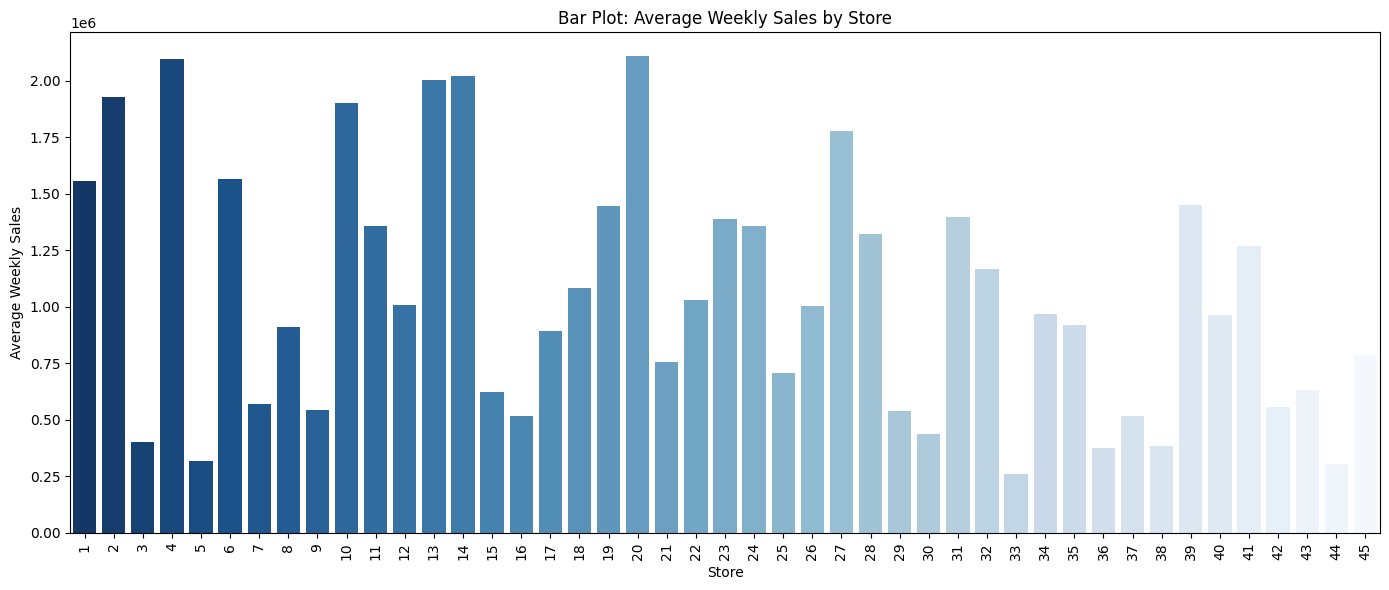

In [ ]:
# ------------------------------------
# Visualization and Analysis
# ------------------------------------
#Bar Plot
plt.figure(figsize=(14, 6))
avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=avg_sales.index, y=avg_sales.values, palette='Blues_r')
plt.title("Bar Plot: Average Weekly Sales by Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-3-f0a0d8c3cd7b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette='pastel')


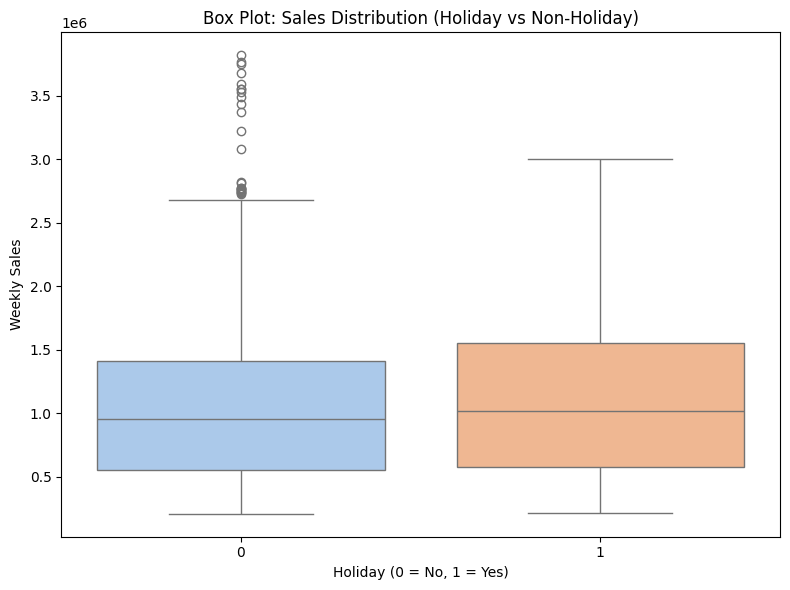

In [ ]:
#Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette='pastel')
plt.title("Box Plot: Sales Distribution (Holiday vs Non-Holiday)")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()


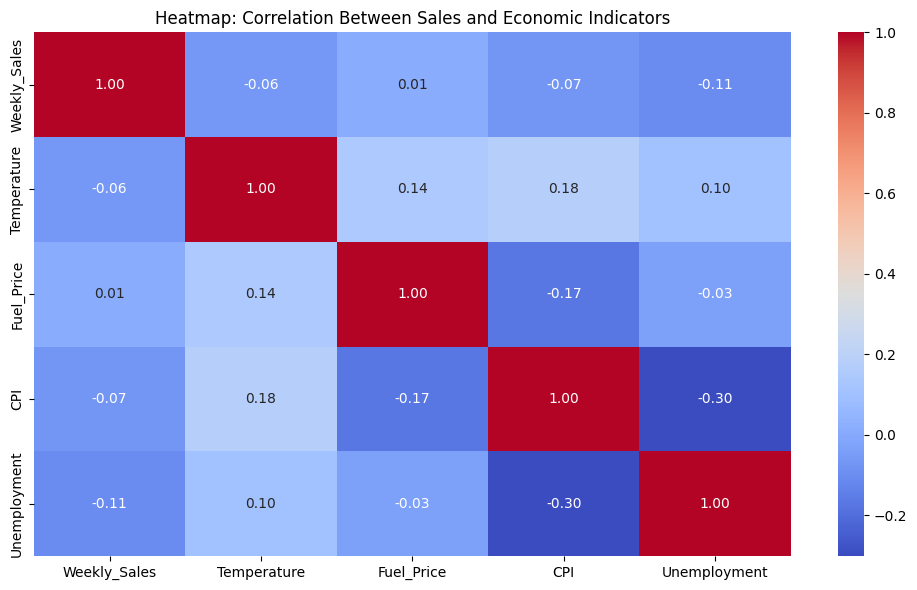

In [ ]:
#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap: Correlation Between Sales and Economic Indicators")
plt.tight_layout()
plt.show()


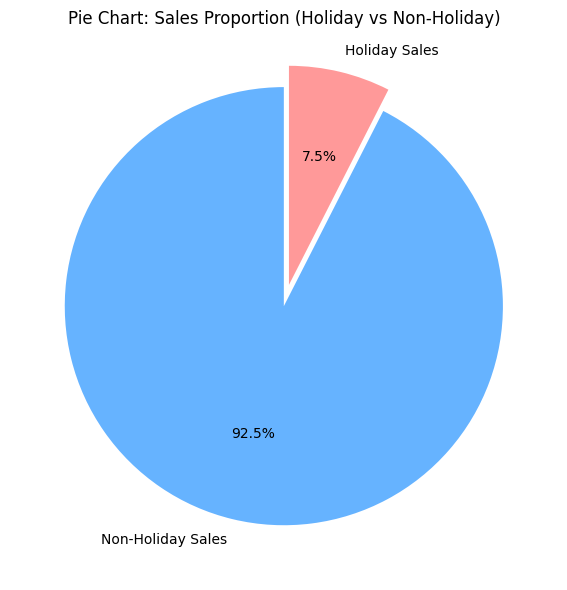

In [ ]:
#Pie Chart
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()
labels = ['Non-Holiday Sales', 'Holiday Sales']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(holiday_sales, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0, 0.1])
plt.title("Pie Chart: Sales Proportion (Holiday vs Non-Holiday)")
plt.tight_layout()
plt.show()

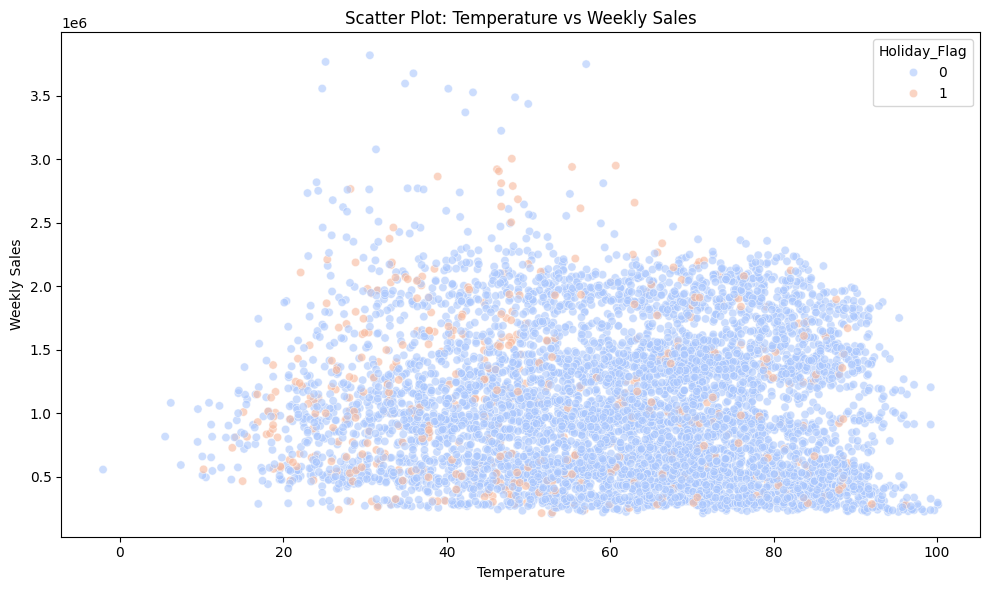

In [ ]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, hue='Holiday_Flag', palette='coolwarm', alpha=0.6)
plt.title("Scatter Plot: Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

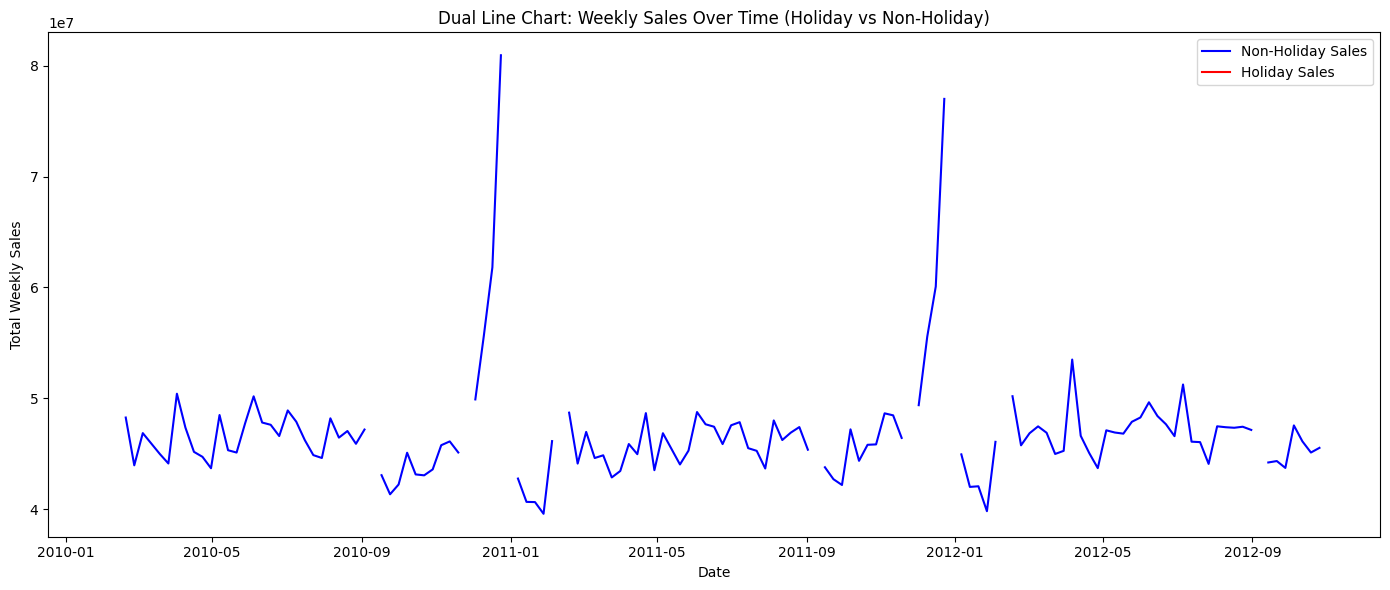

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/Walmart_Store_sales.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Adjust if your date format is different

# Sort the data by date
df = df.sort_values('Date')

# Group by Date and Holiday_Flag to get total sales
dual_line_data = df.groupby(['Date', 'Holiday_Flag'])['Weekly_Sales'].sum().unstack()

# Plot the dual line chart
plt.figure(figsize=(14, 6))
plt.plot(dual_line_data.index, dual_line_data[0], label='Non-Holiday Sales', color='blue')
plt.plot(dual_line_data.index, dual_line_data[1], label='Holiday Sales', color='red')
plt.title("Dual Line Chart: Weekly Sales Over Time (Holiday vs Non-Holiday)")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Calculate average revenue per box by product
product_value = df_clean.groupby('Product')['Revenue per Box'].mean().nlargest(10)

# Horizontal bar plot
plt.figure(figsize=(10, 6))
product_value.sort_values().plot(kind='barh', color='purple')
plt.title('Top 10 Products by Revenue per Box ($)')
plt.xlabel('Revenue per Box ($)')
plt.ylabel('Product')
plt.show()


NameError: name 'df_clean' is not defined